In [1]:
using Statistics, Lux, MLUtils, OneHotArrays, MLDatasets, Plots
using Base: @kwdef
using Random: Xoshiro

In [2]:
using Pkg

In [3]:
include("src/network.jl")
include("src/vsa.jl")
include("src/spiking.jl")

LoadError: LoadError: syntax: expected "]"
in expression starting at /Users/wilkie/code/phasor_julia/src/network.jl:133

In [4]:
#dim_vsa, time samples, batch

In [5]:
q = random_symbols((512, 32, 1))
k = random_symbols((512, 20, 1))
v = random_symbols((512, 20, 1));

In [6]:
sa = SpikingArgs()

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.02 (V)


In [7]:
tspan = (0.0, 10.0)

(0.0, 10.0)

In [8]:
to_spk = x -> phase_to_train(x, sa, repeats = 10)

#91 (generic function with 1 method)

In [9]:
qst = to_spk(q)

Spike Train: (512, 32, 1) with 163840 spikes.

In [10]:
ss = similarity(qst, qst, spk_args = sa);

In [11]:
ss |> size

(1, 32, 1, 1001)

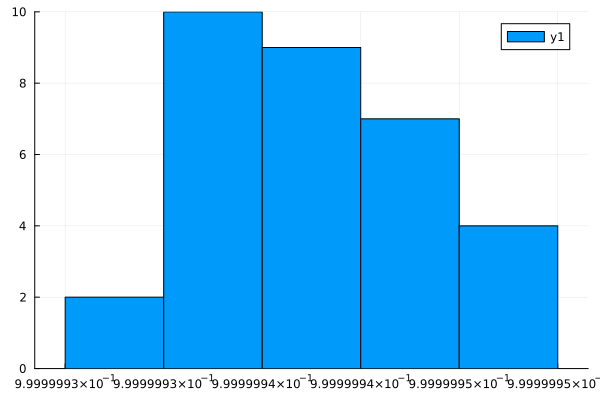

In [12]:
histogram( ss[:,:,:,end] |> vec)

In [13]:
qst.shape

(512, 32, 1)

In [14]:
kst = to_spk(k)
vst = to_spk(v)

Spike Train: (512, 20, 1) with 102400 spikes.

In [17]:
simo = similarity_outer(qst, kst, 2);

In [20]:
simo |> size

(1, 1, 1001, 32, 20)

In [28]:
simr = permutedims(simo[1,1,:,:,:], (2,3,1));

In [29]:
simr |> size

(32, 20, 1001)

In [23]:
so = similarity_outer(q, k, 2);

In [24]:
so |> size

(1, 1, 32, 20)

In [34]:
err = vec(so[1,1,:,:]) .- vec(simr[:,:,end]);

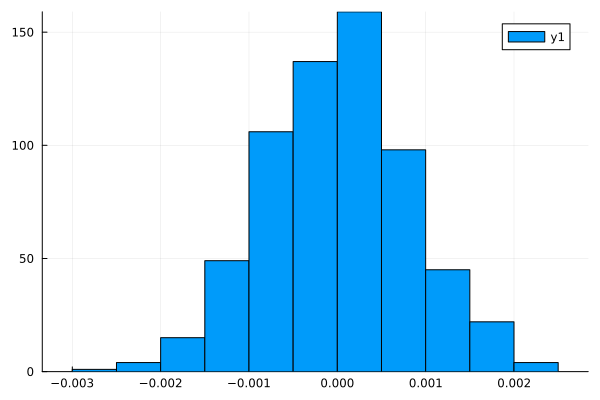

In [35]:
histogram(err)

In [18]:
v_u = phase_memory(vst, tspan=tspan, spk_args=sa);

In [19]:
v_u |> size

(512, 20, 1, 1001)

In [36]:
simo |> size

(1, 1, 1001, 32, 20)

In [29]:
axes(v_u,3)

Base.OneTo(1)

In [37]:
o = [v_u[:,:,b,t] * simo[1,1,t,:,:]' for b in axes(v_u, 3), t in axes(v_u,4)]

1×1001 Matrix{Matrix{ComplexF64}}:
 [0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; … ; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im]  …  [0.000300899+0.000237366im 0.000251556-0.000363389im … -0.000171821-0.000644453im 1.78373e-5+0.000137912im; -0.00042552-0.000133497im -0.000210554-0.000160723im … -0.000502446-0.000319287im -7.45496e-5-0.000500618im; … ; 7.92877e-5-0.000372391im -0.000214195+0.00060259im … 0.000382369-0.000524797im 4.99728e-5+0.000289883im; 0.000541122-0.000431303im -0.000105065-0.000103559im … -0.000428137-2.20345e-5im -5.98153e-6+0.000289071im]

In [38]:
os = stack(o)

512×32×1×1001 Array{ComplexF64, 4}:
[:, :, 1, 1] =
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱                ⋮       
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.

In [43]:
os |> size

(512, 32, 1, 1001)

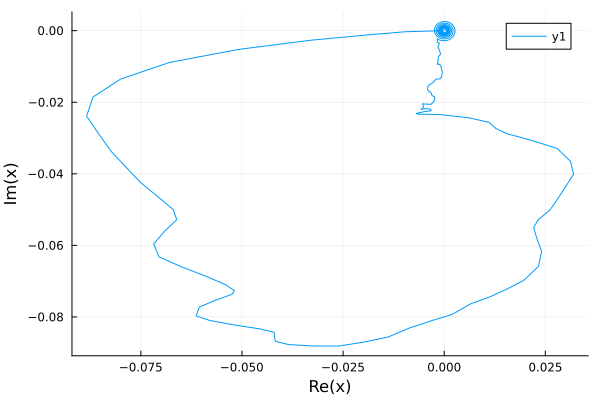

In [48]:
plot(os[1,3,1,:])

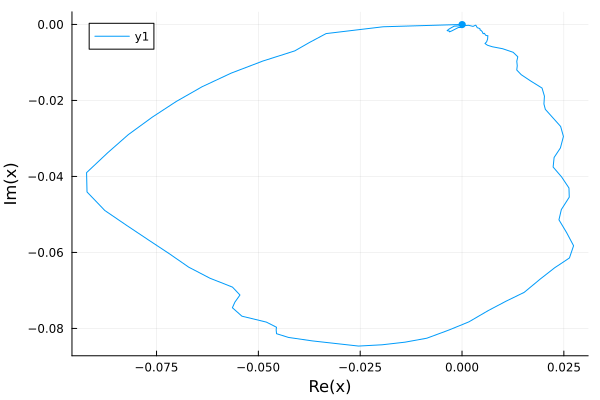

In [49]:
plot(os[5,3,1,:])

In [ ]:
[v_u[i,:,:] * simo]

In [19]:
simo[1,1]

1×1×1001 Array{Float64, 3}:
[:, :, 1] =
 -1.0

[:, :, 2] =
 -0.9599619027562112

[:, :, 3] =
 -0.9482426168279863

;;; … 

[:, :, 999] =
 0.02141360541210413

[:, :, 1000] =
 0.021413613015878054

[:, :, 1001] =
 0.02141361063260605

In [50]:
ints2 = similarity_outer(qst, kst, 2);

In [45]:
so_s = [i[1,1,end] for i in ints]

32×20 Matrix{Float64}:
  0.027363      0.0171821   -0.0305645    …   0.0106061    0.00631645
 -0.0113427     0.0310937   -0.0462861        0.00191286  -0.0226386
  0.0114471     0.013312    -0.0179054        0.0155704   -0.0310326
  0.00384753   -0.0147158    0.0465013        0.0324986    0.0464599
  0.0192863     0.0155304   -0.0264014        0.0096151   -0.0410076
  0.0655437     0.0196495    0.027824     …  -0.013291    -0.00341029
 -0.0235613    -0.0107478    0.048582        -0.0117363    0.0411319
 -0.00851678    0.022033     0.00282574      -0.0481875   -0.000154988
  0.0384698    -0.0129865    0.0685929       -0.00653632   0.0188428
  0.0251894    -0.0409403   -0.00469569       0.0326052   -0.00157384
  ⋮                                       ⋱               
 -0.000318615  -0.0177787   -0.00381403       0.017969     0.0570635
  0.0345115    -0.0175545    0.00193963       0.00865572  -0.0299952
  0.0186696     0.0484572    0.0039956    …   0.0695192   -0.00221724
  0.0056802    

In [51]:
so_s2 = [i[1,1,end] for i in ints2]

32×20 Matrix{Float64}:
  0.027363      0.0171821   -0.0305645    …   0.0106061    0.00631645
 -0.0113427     0.0310937   -0.0462861        0.00191286  -0.0226386
  0.0114471     0.013312    -0.0179054        0.0155704   -0.0310326
  0.00384753   -0.0147158    0.0465013        0.0324986    0.0464599
  0.0192863     0.0155304   -0.0264014        0.0096151   -0.0410076
  0.0655437     0.0196495    0.027824     …  -0.013291    -0.00341029
 -0.0235613    -0.0107478    0.048582        -0.0117363    0.0411319
 -0.00851678    0.022033     0.00282574      -0.0481875   -0.000154988
  0.0384698    -0.0129865    0.0685929       -0.00653632   0.0188428
  0.0251894    -0.0409403   -0.00469569       0.0326052   -0.00157384
  ⋮                                       ⋱               
 -0.000318615  -0.0177787   -0.00381403       0.017969     0.0570635
  0.0345115    -0.0175545    0.00193963       0.00865572  -0.0299952
  0.0186696     0.0484572    0.0039956    …   0.0695192   -0.00221724
  0.0056802    

In [46]:
so = similarity_outer(q, k, 2);

In [47]:
err = vec(so_s) .- vec(so);

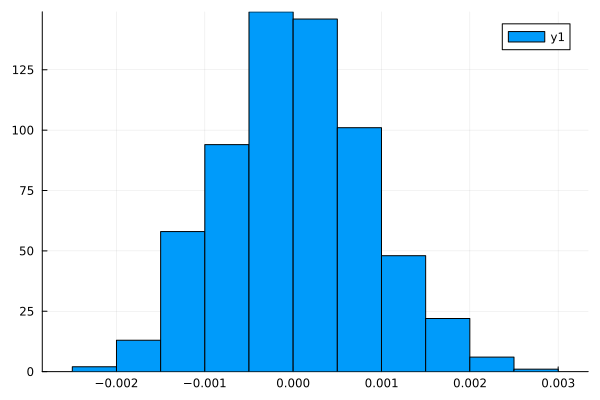

In [48]:
histogram(err)

In [52]:
o = attend(q, k, v)

512×32×1 Array{Float64, 3}:
[:, :, 1] =
  0.834852    0.397759    0.233063    …  -0.471151  -0.939222   -0.40451
 -0.489847   -0.76314     0.113605        0.417835  -0.797217    0.326966
  0.937242    0.943913   -0.877202       -0.695128  -0.714341   -0.23734
 -0.822559    0.488697   -0.113007       -0.765705   0.321536   -0.651625
  0.484534    0.931186   -0.107163        0.385503   0.628485    0.954808
  0.71309    -0.400636   -0.264031    …   0.882529   0.735122    0.124775
 -0.0232269   0.587705    0.385779        0.562253  -0.567379    0.313513
 -0.617799   -0.534114    0.468524       -0.947469   0.723584   -0.517597
 -0.455814    0.714158    0.616687       -0.834658   0.475367   -0.185771
 -0.841172    0.815509    0.00724711     -0.430327  -0.0277655  -0.730305
  ⋮                                   ⋱              ⋮          
 -0.606659    0.760625   -0.0510966      -0.151904  -0.992813   -0.065181
 -0.822327    0.399425    0.062288       -0.551584  -0.363051   -0.944688
  0.55796

In [53]:
using Zygote

In [54]:
loss = x -> 1.0 - sum(attend(x, k, v))

#193 (generic function with 1 method)

In [55]:
loss(q)

99.43187813667191

In [57]:
val, grads = Zygote.withgradient(loss, q)

(val = 99.43187813667191, grad = ([2.6733044560412127 -1.0946112601764617 … -0.3910048589469506 -0.4081670600493493; 1.926724547124937 1.29734993999807 … 0.2427180666656027 -0.5950517202469824; … ; -1.151641889969519 -0.8146418365429171 … 1.9549867243290986 1.401839552850427; 0.29311913111776394 0.8199642487496458 … 0.8603572796569925 -0.9989658628764937;;;],))